In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv("train.csv")

In [125]:
df.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [127]:
df['escuelascercanas'].value_counts()

0.0    133406
1.0    106594
Name: escuelascercanas, dtype: int64

In [128]:
df['piscina'].value_counts()

0.0    219028
1.0     20972
Name: piscina, dtype: int64

In [129]:
df['centroscomercialescercanos'].value_counts() 

0.0    144832
1.0     95168
Name: centroscomercialescercanos, dtype: int64

In [130]:
df['gimnasio'].value_counts()

0.0    225006
1.0     14994
Name: gimnasio, dtype: int64

In [131]:
df['usosmultiples'].value_counts()

0.0    226778
1.0     13222
Name: usosmultiples, dtype: int64

In [132]:
df['precio'].value_counts()

1500000.0     3041
2500000.0     3036
1200000.0     2909
3500000.0     2726
1300000.0     2480
2200000.0     2420
1100000.0     2394
1800000.0     2290
1600000.0     2217
850000.0      2192
750000.0      2163
1250000.0     2159
2300000.0     2108
1350000.0     2103
650000.0      2061
3200000.0     2054
4500000.0     2040
2000000.0     1904
950000.0      1867
1650000.0     1865
2800000.0     1863
1400000.0     1850
550000.0      1820
2100000.0     1802
3000000.0     1791
1700000.0     1763
1850000.0     1760
2600000.0     1735
1150000.0     1722
1750000.0     1702
              ... 
10807000.0       1
468778.0         1
675411.0         1
468768.0         1
7500250.0        1
10815000.0       1
3752490.0        1
469105.0         1
338144.0         1
1352990.0        1
938630.0         1
10822700.0       1
2705670.0        1
1877000.0        1
407500.0         1
1352610.0        1
676300.0         1
2705184.0        1
938426.0         1
1876500.0        1
1352560.0        1
469208.0    

In [133]:
#NUMERICOS ENTEROS QUE ERAN INNECESARIAMENTE FLOAT
#------------------------------------------------#

#NUMERICOS QUE SOLO SON CERO O UNO
df['usosmultiples'] = df['usosmultiples'].astype('bool')
df['piscina'] = df['piscina'].astype('bool')
df['gimnasio'] = df['gimnasio'].astype('bool')
df['escuelascercanas'] = df['escuelascercanas'].astype('bool')
df['centroscomercialescercanos'] = df['centroscomercialescercanos'].astype('bool')


#FECHA DE PUBLICACION A DATETIME
df['fecha'] = pd.to_datetime(df['fecha'])


# A estos hay que limpiarles los inf y los NaN antes de convertir a int

#df['antiguedad'] = df.antiguedad.astype('int64')
#df['garages'] = df.garages.astype('int64')
#df['habitaciones'] = df.habitaciones.astype('int64')
#df['metrostotales'] = df.metrostotales.astype('int64')
#df['metroscubiertos'] = df.metroscubiertos.astype('int64')
#df['idzona'] = df.idzona.astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [134]:
# A estos hay que limpiarles los inf y los NaN antes de convertir a int

#df['antiguedad'] = df.antiguedad.astype('int64')
#df['garages'] = df.garages.astype('int64')
#df['habitaciones'] = df.habitaciones.astype('int64')
#df['metrostotales'] = df.metrostotales.astype('int64')
#df['metroscubiertos'] = df.metroscubiertos.astype('int64')
#df['idzona'] = df.idzona.astype('int64')

In [135]:
df['antiguedad'].value_counts()

0.0     50335
5.0     33268
10.0    28844
20.0    19904
1.0     12353
4.0      7944
3.0      5616
2.0      5059
15.0     3965
6.0      3169
30.0     3055
8.0      2418
25.0     2297
7.0      2046
12.0     1492
11.0     1434
40.0     1347
50.0     1193
9.0      1065
35.0      938
18.0      908
21.0      742
16.0      700
14.0      616
13.0      577
17.0      529
22.0      448
28.0      396
26.0      369
45.0      329
        ...  
47.0       40
55.0       38
48.0       36
46.0       31
70.0       29
41.0       27
80.0       27
53.0       17
49.0       17
65.0       17
52.0       11
58.0       10
54.0        9
75.0        6
66.0        5
59.0        5
69.0        5
67.0        4
57.0        4
63.0        4
62.0        3
56.0        3
74.0        2
68.0        2
79.0        2
61.0        2
76.0        2
71.0        1
77.0        1
64.0        1
Name: antiguedad, Length: 78, dtype: int64

In [136]:
len(df)

240000

In [137]:
#Vemos cuántos NaN hay por columna, sabiendo que el total es 240000
df.isnull().sum()

id                                 0
titulo                          5387
descripcion                     1619
tipodepropiedad                   46
direccion                      53072
ciudad                           372
provincia                        155
antiguedad                     43555
habitaciones                   22471
garages                        37765
banos                          26221
metroscubiertos                17400
metrostotales                  51467
idzona                         28621
lat                           123488
lng                           123488
fecha                              0
gimnasio                           0
usosmultiples                      0
piscina                            0
escuelascercanas                   0
centroscomercialescercanos         0
precio                             0
dtype: int64

In [138]:
#Reemplazo los NaN por 0
df.loc[(df['lat']).isnull(),['lat']]=0
df.loc[(df['lng']).isnull(),['lng']]=0

In [139]:
df['lat'].isnull().sum()

0

In [140]:
df['lng'].isnull().sum()

0

In [141]:
df['lat'].value_counts()

0.000000     123936
23.063781         8
23.054936         7
19.314000         6
19.392000         6
19.391000         6
19.617000         6
19.393000         6
19.358000         6
19.489000         6
23.053672         6
19.558000         6
19.457000         6
19.410000         6
32.454473         5
23.068835         5
19.300000         5
19.332000         5
19.503000         5
19.369000         5
19.485000         5
19.388000         5
19.344000         5
19.350000         5
19.387000         5
19.437000         5
19.397000         5
19.478000         5
19.444000         5
19.494000         5
              ...  
17.094446         1
20.997915         1
19.591669         1
19.417518         1
19.727337         1
19.476194         1
19.359454         1
19.287115         1
18.987497         1
19.495689         1
20.662757         1
19.492759         1
20.743466         1
21.160287         1
19.433077         1
19.359921         1
19.361805         1
20.642669         1
24.009796         1


In [142]:
df['lng'].value_counts()

 0.000000      123937
-99.225000         12
-99.218984          9
-99.139000          8
-99.213000          8
-99.230000          8
-99.143540          7
-99.156000          7
-99.125000          7
-99.191000          7
-99.227000          7
-99.177446          7
-99.234000          7
-99.200000          7
-99.144000          7
-99.183676          7
-99.163000          7
-99.175000          6
-99.171909          6
-99.055727          6
-99.153000          6
-99.195000          6
-99.202366          6
-99.133163          6
-99.170000          6
-99.258000          6
-99.226000          6
-99.165000          6
-99.211000          6
-99.161000          6
                ...  
-100.976336         1
-103.439241         1
-103.464754         1
-96.191890          1
-99.303276          1
-116.761322         1
-106.117890         1
-99.007759          1
-98.941038          1
-100.369562         1
-102.311859         1
-99.156190          1
-99.136433          1
-100.102952         1
-100.42845

In [143]:
#Ahora cambio el tipo de dato de las columnas 'lat' y 'lng'
df['lat'] = df['lat'].astype(np.float32)
df['lng'] = df['lng'].astype(np.float32)

In [144]:
df['titulo'].value_counts()

casa en venta                                                                              468
departamento en venta                                                                      289
casa en venta en chihuahua                                                                 268
casa en venta en querétaro                                                                 238
departamento en venta en benito juárez                                                     221
departamento en venta en miguel hidalgo                                                    177
casa en venta en mérida                                                                    167
casa en venta                                                                              132
casa en venta en torreón                                                                   119
casa en venta en mérida, yucatán                                                           115
casa en venta en monterrey                        

In [145]:
#Elimino los NaN
df.loc[(df['titulo']).isnull(), ['titulo']] = ''
df['titulo'] = df['titulo'].astype(str)

In [146]:
df['banos'].value_counts()

2.0    87683
1.0    58173
3.0    49365
4.0    18558
Name: banos, dtype: int64

In [147]:
#Lo paso a tipo category porque tenemos 4 valores distintos 
df.loc[(df['banos']).isnull(), ['banos']] = 0
df['banos'] = df['banos'].astype('category')

In [148]:
df['garages'].value_counts()

2.0    94167
1.0    59464
0.0    26926
3.0    21678
Name: garages, dtype: int64

In [149]:
#Lo paso a tipo category porque tenemos 4 valores distintos 
df.loc[(df['garages']).isnull(), ['garages']] = 0
df['garages'] = df['garages'].astype('category')

In [150]:
df['direccion'].value_counts()

-                                                                                                                       660
.                                                                                                                       476
1                                                                                                                       212
Calle                                                                                                                   194
Norte de Mérida                                                                                                         136
x #x                                                                                                                    122
0                                                                                                                       113
domicilio conocido                                                                                                      105
calle   

In [151]:
#Limpio las direcciones que no son calles

df.loc[(df['direccion']).isnull(), ['direccion']] = 'S/D'
df.loc[(df['direccion']) == 'S/N', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == 'Sin nombre', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == '0', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == '--', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == '...', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == '-', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == '.', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == 'x #x', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == 'x', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == 'calle', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == 'Calle', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == '1', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == 'X', ['direccion']] = 'S/D'

In [152]:
df['direccion'] = df['direccion'].astype('str')

In [153]:
#verifico si se publico mas de una vez la misma vivienda 
df['direccion'].value_counts()

S/D                                                                                                                     55405
Norte de Mérida                                                                                                           136
domicilio conocido                                                                                                        105
Calle 18 No.344 x 11 y 13 Col. Camara de Comercio Norte                                                                    94
Juriquilla                                                                                                                 84
El Refugio                                                                                                                 78
Metepec                                                                                                                    77
CENTRO                                                                                                                

In [154]:
filtro = df['direccion']=="Calle 60 No.191, primer piso, Col. Cordemex"   
df1=df[filtro]
df1.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
1555,139993,venta de preciosa casa en privada residencial ...,<p>terreno 400m2 (10 x 40)construcci&oacute;n ...,Casa,"Calle 60 No.191, primer piso, Col. Cordemex",Mérida,Yucatán,0.0,3.0,2.0,...,114343.0,0.0,0.0,2013-11-01,False,False,True,False,True,1550000.0
6941,121587,casa en pre venta en dzitya!! m.n.amplio terr...,<p>terreno: 13.06 x 44.00 ( 573.32 m2 ).constr...,Casa,"Calle 60 No.191, primer piso, Col. Cordemex",Mérida,Yucatán,0.0,3.0,2.0,...,114325.0,0.0,0.0,2013-11-01,False,False,False,False,True,1298000.0
7022,272949,casa en venta en privada residencial de xcanat...,<p>terreno 15 x 35 (531 m2 aprox ). construcci...,Casa,"Calle 60 No.191, primer piso, Col. Cordemex",Mérida,Yucatán,0.0,3.0,2.0,...,114324.0,0.0,0.0,2013-09-10,False,False,True,True,True,3205000.0
10441,262898,aproveche hermosas casa en venta en las margar...,<p>terreno: 10 x 25 ( 250 m2 ).construcci&oacu...,Casa,"Calle 60 No.191, primer piso, Col. Cordemex",Mérida,Yucatán,0.0,3.0,2.0,...,NaN,0.0,0.0,2014-01-09,False,False,True,False,True,1590000.0
11672,279897,"casa en venta en leandro valle, m.n, amplios ...",<p>terreno: 8.65 x 24.85 ( 213.50 m2 ).constru...,Casa,"Calle 60 No.191, primer piso, Col. Cordemex",Mérida,Yucatán,0.0,3.0,2.0,...,113945.0,0.0,0.0,2013-11-01,False,False,False,False,True,1150000.0


In [155]:
filtro = df['direccion']=="Calle 18 No.344 x 11 y 13 Col. Camara de Comercio Norte"   
df1=df[filtro]
df1.head()
#las casas tienen la misma direccion pero no coinciden el resto de los datos por lo que debe ser un error al rellenar los datos

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
1103,259847,"casa en venta en la mejor zona de montecristo,...",apartela con tramitamos su credito sin costo. ...,Casa,Calle 18 No.344 x 11 y 13 Col. Camara de Comer...,Mérida,Yucatán,0.0,3.0,2.0,...,114344.0,0.0,0.0,2014-08-05,False,False,True,True,True,1990000.0
2932,277997,"casa en venta en montes de ame, m.n. en esqui...",terreno: 13x 24 (331 m2). irregular\r\nconstru...,Casa,Calle 18 No.344 x 11 y 13 Col. Camara de Comer...,Mérida,Yucatán,0.0,3.0,0.0,...,113862.0,0.0,0.0,2014-02-10,False,False,True,True,True,2595000.0
4770,108866,"casa en venta en leandro valle, m.n, a precio...",terreno de 7.50x41 (307.50 m2)construccion de ...,Casa,Calle 18 No.344 x 11 y 13 Col. Camara de Comer...,Mérida,Yucatán,0.0,3.0,2.0,...,113945.0,0.0,0.0,2015-01-31,False,False,True,False,False,1025000.0
6494,232464,"casa en venta en montebello, m.n. 1 planta!!",terreno 12x35 (408)\r\nconstruccion 330 m2\r\n...,Casa,Calle 18 No.344 x 11 y 13 Col. Camara de Comer...,Mérida,Yucatán,0.0,3.0,3.0,...,113851.0,0.0,0.0,2014-03-21,False,False,True,True,True,3450000.0
7383,193903,"casa en venta en xcumpich, diseño arquitectoni...",terreno: 9 x 25 ( 225 m2 ). \nconstrucción: 23...,Casa,Calle 18 No.344 x 11 y 13 Col. Camara de Comer...,Mérida,Yucatán,1.0,3.0,2.0,...,114077.0,0.0,0.0,2014-06-12,False,False,True,True,True,1750000.0


In [156]:
#¿Como afecta la antiguedad al precio?
# Me quedo solo con las antiguedades que no son NaN
df1 = df.dropna(subset=['antiguedad'])
df1

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310204,-99.227654,2013-06-28,False,False,False,True,True,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,0.000000,0.000000,2015-10-17,False,False,False,False,False,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301889,-99.688019,2012-03-09,False,False,False,True,True,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,0.000000,0.000000,2016-06-07,False,False,False,False,False,1150000.0
5,126147,departamento en venta taxqueña,"amplio departamento, estancia de sala y comedo...",Apartamento,Condominio Tlalpan 2B,Coyoacán,Distrito Federal,5.0,2.0,1.0,...,23650.0,19.300611,-99.148476,2014-03-18,False,False,False,False,True,1100000.0
7,5013,casa emilia en venta en selvamar playa del carmen,casa emilia en venta playa del carmenfracciona...,Casa,condominio el trebol,Playa del Carmen,Quintana Roo,2.0,4.0,2.0,...,130510.0,20.672611,-87.037971,2016-10-20,False,False,False,False,False,4200000.0
8,44962,pre- venta preciosos depas 2 recamaras con sub...,<p>pre-venta de preciosos departamento ecologi...,Apartamento,BUENAVISTA DEPTOS CON SUBSIDIO,Villa de Alvarez,Colima,1.0,2.0,1.0,...,9010.0,0.000000,0.000000,2014-01-06,False,False,False,True,True,310000.0
10,51180,mi 2° credito,<p>mi 2&deg; credito<br />para todos aquellos ...,Casa,MI 2° CREDITO,San Luis Potosí,San luis Potosí,0.0,3.0,1.0,...,87542.0,22.195877,-101.018959,2013-01-03,False,False,False,True,True,488000.0
12,47890,hermosa casa en zibata queretaro 170m²,<p><strong>casa </strong>en venta en fracciona...,Casa,"Pitahayas 2 - 58, Zibata",Querétaro,Querétaro,0.0,3.0,2.0,...,83666.0,20.682878,-100.317505,2013-08-12,False,True,False,True,True,1500000.0
13,130216,casa matias romero - sión bancaria,flamante casa habitación en condominio horizon...,Casa,"MATIAS ROMERO, COLONIA DEL VALLE",Benito Juárez,Distrito Federal,20.0,NaN,0.0,...,50003995.0,19.374895,-99.149521,2015-03-31,False,False,False,False,False,3000000.0


In [157]:
#Me quedo solo con lo que me interesa para el analisis
dfanalisis = df1.pivot_table(index='tipodepropiedad', columns='antiguedad', values='precio', aggfunc='mean')
dfanalisis

antiguedad,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,68.0,69.0,70.0,71.0,74.0,75.0,76.0,77.0,79.0,80.0
tipodepropiedad,,,,,,,,,,,,,,,,,,,,,
Apartamento,3.080685e+06,3.316171e+06,3.499709e+06,3.257088e+06,3.327739e+06,2.926548e+06,2.899291e+06,2.594682e+06,2.779939e+06,2.471478e+06,...,1250000.0,NaN,1712500.0,NaN,1250000.0,1350000.0,NaN,NaN,NaN,9.033333e+05
Bodega comercial,2.239810e+06,1.677667e+06,3.397909e+06,2.067767e+06,3.272500e+06,2.625388e+06,2.417175e+06,2.332000e+06,2.650000e+06,3.116667e+06,...,NaN,NaN,6150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Casa,2.315236e+06,2.343017e+06,2.447398e+06,2.298907e+06,2.155998e+06,2.043185e+06,1.875494e+06,1.896391e+06,1.730661e+06,1.812145e+06,...,10800000.0,4523750.0,4009500.0,2300000.0,3500000.0,4762500.0,NaN,869677.0,NaN,4.637952e+06
Casa en condominio,2.906432e+06,2.545016e+06,2.815432e+06,2.667786e+06,2.654304e+06,2.727429e+06,2.394213e+06,2.280868e+06,2.375608e+06,2.469995e+06,...,NaN,NaN,NaN,NaN,NaN,3500000.0,NaN,NaN,NaN,NaN
Casa uso de suelo,2.230986e+06,4.917000e+06,3.000833e+06,2.723750e+06,2.381955e+06,3.693252e+06,2.937500e+06,2.815000e+06,2.570000e+06,7.900000e+06,...,NaN,NaN,2500000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Departamento Compartido,2.871596e+06,3.360000e+06,1.909667e+06,4.524000e+06,3.668000e+06,3.353231e+06,NaN,NaN,6.500000e+06,1.300000e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duplex,1.798111e+06,9.661250e+05,1.661250e+06,9.025556e+05,1.027500e+06,8.953250e+05,NaN,1.230000e+06,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Edificio,4.443725e+06,4.459038e+06,5.053222e+06,3.983529e+06,5.115339e+06,5.060382e+06,2.980714e+06,3.668000e+06,5.890357e+06,5.915000e+06,...,NaN,10200000.0,NaN,NaN,NaN,NaN,10000000.0,NaN,NaN,5.000000e+06
Huerta,1.500000e+06,NaN,NaN,3.500000e+06,NaN,2.778571e+06,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
#verifico si hay filas con pocas variables no nulas
dfanalisis.count(axis=1)

tipodepropiedad
Apartamento                      68
Bodega comercial                 39
Casa                             75
Casa en condominio               47
Casa uso de suelo                39
Departamento Compartido          10
Duplex                           19
Edificio                         50
Huerta                            5
Inmuebles productivos urbanos    29
Local Comercial                  44
Local en centro comercial        13
Lote                              1
Nave industrial                  15
Oficina comercial                52
Otros                            19
Quinta Vacacional                25
Rancho                           21
Terreno                          26
Terreno comercial                18
Terreno industrial                7
Villa                            22
dtype: int64

In [159]:
#filtro las filas y columnas que no tienen datos sufientes como para ser representativos
dfgraficable = dfanalisis.dropna(thresh=25)
dfgraficable = dfgraficable.dropna(axis=1,thresh=11)
dfgraficable

antiguedad,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0,15.0,20.0,21.0,25.0,30.0,40.0,50.0
tipodepropiedad,,,,,,,,,,,,,,,,,
Apartamento,3.080685e+06,3.316171e+06,3.499709e+06,3.257088e+06,3.327739e+06,2.926548e+06,2.899291e+06,2.594682e+06,2.779939e+06,1.957124e+06,1.592440e+06,2.083062e+06,2.456603e+06,1.526703e+06,1.983460e+06,2.052801e+06,2.318231e+06
Bodega comercial,2.239810e+06,1.677667e+06,3.397909e+06,2.067767e+06,3.272500e+06,2.625388e+06,2.417175e+06,2.332000e+06,2.650000e+06,3.033082e+06,2.696768e+06,3.230878e+06,2.538571e+06,3.330000e+06,3.954348e+06,3.718333e+06,3.412600e+06
Casa,2.315236e+06,2.343017e+06,2.447398e+06,2.298907e+06,2.155998e+06,2.043185e+06,1.875494e+06,1.896391e+06,1.730661e+06,2.268516e+06,2.074957e+06,3.169263e+06,2.794531e+06,2.771318e+06,3.011306e+06,3.596941e+06,4.450222e+06
Casa en condominio,2.906432e+06,2.545016e+06,2.815432e+06,2.667786e+06,2.654304e+06,2.727429e+06,2.394213e+06,2.280868e+06,2.375608e+06,3.159026e+06,2.695215e+06,3.937580e+06,3.803209e+06,3.475775e+06,3.422610e+06,3.432407e+06,4.384615e+06
Casa uso de suelo,2.230986e+06,4.917000e+06,3.000833e+06,2.723750e+06,2.381955e+06,3.693252e+06,2.937500e+06,2.815000e+06,2.570000e+06,3.879474e+06,3.435556e+06,4.331649e+06,2.423750e+06,2.660333e+06,4.270740e+06,4.880741e+06,4.980676e+06
Edificio,4.443725e+06,4.459038e+06,5.053222e+06,3.983529e+06,5.115339e+06,5.060382e+06,2.980714e+06,3.668000e+06,5.890357e+06,5.051831e+06,5.111789e+06,5.427219e+06,5.965000e+06,4.980400e+06,4.830383e+06,6.304828e+06,5.453845e+06
Inmuebles productivos urbanos,4.500000e+06,3.603133e+06,6.600000e+06,3.637500e+06,4.824667e+06,3.181793e+06,2.618000e+06,5.837500e+06,2.650000e+06,3.526279e+06,1.375000e+06,3.771256e+06,2.200000e+06,3.453074e+06,4.560164e+06,6.312500e+06,4.770000e+06
Local Comercial,2.188357e+06,2.741616e+06,1.940250e+06,2.052413e+06,2.081737e+06,2.171321e+06,2.019846e+06,2.163611e+06,1.629333e+06,2.600767e+06,2.145686e+06,2.779481e+06,2.579286e+06,2.530833e+06,2.235949e+06,4.584419e+06,3.546863e+06
Oficina comercial,3.063069e+06,3.214418e+06,2.866426e+06,3.180267e+06,3.455728e+06,3.528850e+06,3.083293e+06,2.097857e+06,2.190300e+06,3.297693e+06,3.233091e+06,3.351855e+06,2.627556e+06,1.917969e+06,2.487336e+06,3.365031e+06,3.637266e+06


In [160]:
dfgraficable=dfgraficable.drop(['Terreno','Casa uso de suelo','Inmuebles productivos urbanos','Bodega comercial'],axis=0)
#Elimino algunas filas que no son demasiado interesantes para el analisis para que el grafico sea mas facil de entender

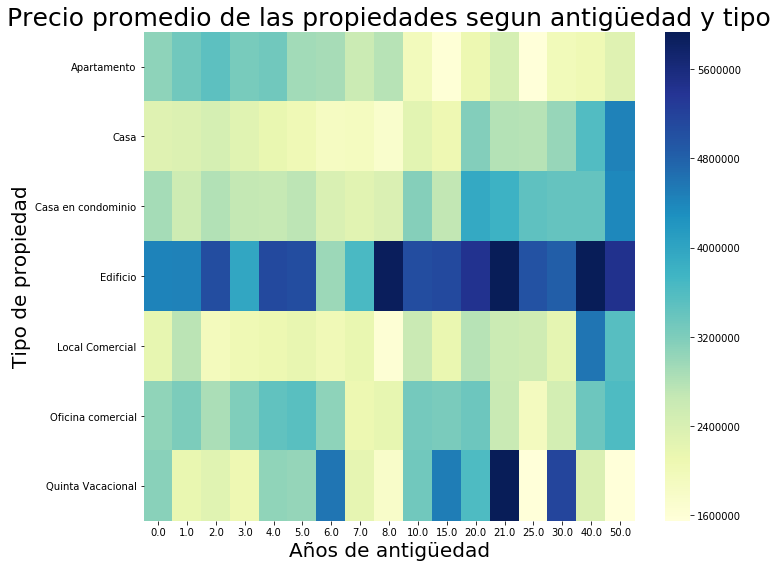

In [184]:
plt.figure(figsize=(11,9))
g = sns.heatmap(dfgraficable,robust= True, cmap="YlGnBu")  #annot=True
g.set_title("Precio promedio de las propiedades segun antigüedad y tipo", fontsize=25)
g.set_xlabel("Años de antigüedad",fontsize=20)
g.set_ylabel("Tipo de propiedad", fontsize=20)

fig = g.get_figure()
fig.savefig("Precio_promedio_antiguedad_y_tipo", bbox_inches = 'tight')


In [162]:
#Analizando precio por provincia de casas y apartamentos
df_casas= df[df['tipodepropiedad']=='Casa']
df_apartamentos= df[df['tipodepropiedad']=='Apartamento']

In [163]:
df_apartamentos['provincia'].value_counts()

Distrito Federal         33839
Edo. de México            8297
Jalisco                   2638
Nuevo León                1847
San luis Potosí           1686
Guerrero                  1586
Puebla                    1522
Quintana Roo              1273
Querétaro                 1084
Morelos                    859
Yucatán                    573
Veracruz                   565
Tamaulipas                 232
Baja California Norte      196
Michoacán                  158
Guanajuato                 148
Nayarit                    107
Tabasco                     97
Sinaloa                     86
Colima                      83
Baja California Sur         82
Chiapas                     52
Hidalgo                     51
Oaxaca                      49
Aguascalientes              47
Chihuahua                   41
Tlaxcala                    31
Durango                     26
Coahuila                    20
Sonora                      17
Campeche                     7
Zacatecas                    1
Name: pr

In [164]:
#ME quedo con las provincias con mas datos para analizar
filtro_provincias=df_apartamentos['provincia'].value_counts()>200
filtro_provincias=filtro_provincias[filtro_provincias]
df_apartamentos=df_apartamentos[df_apartamentos['provincia'].isin(filtro_provincias.index)]
df_apartamentos

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,0.000000,0.000000,2015-08-23,False,False,False,False,False,2273000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,0.000000,0.000000,2016-06-07,False,False,False,False,False,1150000.0
5,126147,departamento en venta taxqueña,"amplio departamento, estancia de sala y comedo...",Apartamento,Condominio Tlalpan 2B,Coyoacán,Distrito Federal,5.0,2.0,1.0,...,23650.0,19.300611,-99.148476,2014-03-18,False,False,False,False,True,1100000.0
11,103293,"departamento en venta, san pedro garza garcia,...","departamento nuevo ,256 m2 de construccion,un ...",Apartamento,S/D,San Pedro Garza García,Nuevo León,NaN,3.0,2.0,...,325095.0,0.000000,0.000000,2014-12-01,False,False,False,False,False,7200000.0
17,73348,"oportunidad, departamento col del valle, 3 rec...",magnifico departamento con excelente distribuc...,Apartamento,Pazaje Santa Cruz,Benito Juárez,Distrito Federal,5.0,3.0,2.0,...,50003995.0,0.000000,0.000000,2016-10-30,False,False,False,True,True,4750000.0
30,257302,,-- hav1407e-285 -- excelente departamento e...,Apartamento,Rio Mante .,Ciudad Madero,Tamaulipas,0.0,2.0,1.0,...,104721.0,0.000000,0.000000,2016-04-08,False,False,False,False,False,750000.0
39,127666,hermoso departamento!!!,hermoso departamento con acabados de muy buen ...,Apartamento,LAS COLONIAS,Atizapán de Zaragoza,Edo. de México,20.0,2.0,1.0,...,55716.0,0.000000,0.000000,2015-01-05,False,False,False,True,True,980000.0
41,212847,departamento en arcos de zapopan,bonito departamento muy bien ubicado en planta...,Apartamento,ARCO PERTINAX,Zapopan,Jalisco,10.0,2.0,1.0,...,311049.0,0.000000,0.000000,2016-05-22,False,False,False,False,False,525000.0
43,224685,renta en acapulco con alberca prvada vista a b...,bonito departamento cerca de sam´s club farall...,Apartamento,RANCHO ACAPULCO,Acapulco de Juárez,Guerrero,3.0,2.0,1.0,...,37846.0,0.000000,0.000000,2014-06-29,False,False,True,True,True,1450000.0
51,116928,excelentes departamentos con exclente ubicación,"1 pb, 2 primer piso, 2 segundo piso. cada depa...",Apartamento,Jesús Carranza No. 55,Cuauhtémoc,Distrito Federal,20.0,2.0,0.0,...,23821.0,0.000000,0.000000,2015-03-27,False,False,False,False,False,680000.0


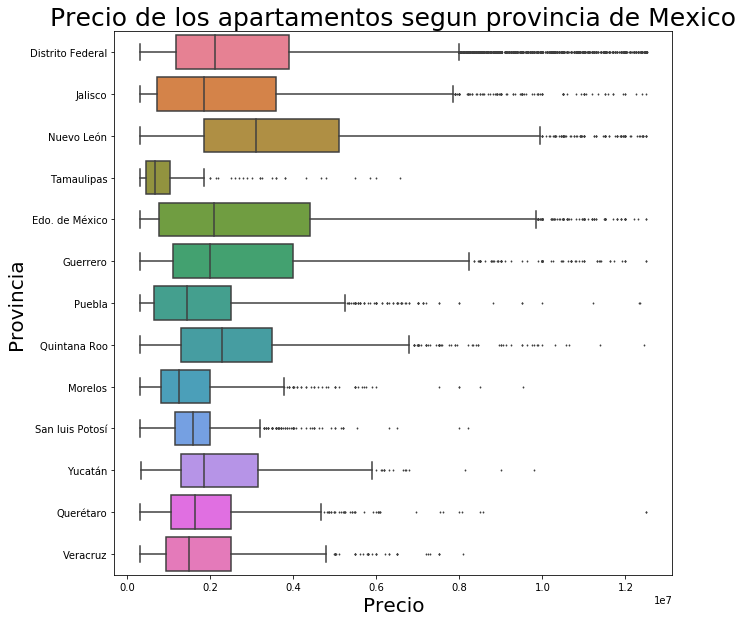

In [165]:
plt.figure(figsize=(10,10))
g = sns.boxplot(x="precio", y="provincia", data=df_apartamentos, palette="husl",fliersize=1)
g.set_title("Precio de los apartamentos segun provincia de Mexico", fontsize=25)
g.set_xlabel("Precio", fontsize=20)
g.set_ylabel("Provincia", fontsize=20)
#Parece haber un precio minimo para publicar y que los dptos mas costos estan en Nuevo Leon 

fig = g.get_figure()
fig.savefig("Precio_apartamento_por_provincia", bbox_inches = 'tight')

In [166]:
df_casas['provincia'].value_counts()

Edo. de México           25938
Distrito Federal         15812
Jalisco                  14196
Nuevo León               11477
Querétaro                11396
Puebla                    6577
Yucatán                   6472
San luis Potosí           5612
Morelos                   4626
Veracruz                  4445
Chihuahua                 3891
Coahuila                  3329
Baja California Norte     2769
Sonora                    2732
Quintana Roo              2343
Guanajuato                2318
Hidalgo                   2134
Durango                   1995
Michoacán                 1981
Tamaulipas                1822
Baja California Sur       1473
Sinaloa                   1449
Aguascalientes            1340
Nayarit                    978
Chiapas                    903
Colima                     777
Tabasco                    722
Tlaxcala                   716
Guerrero                   578
Oaxaca                     529
Campeche                   210
Zacatecas                   80
Name: pr

In [167]:
#ME quedo con las provincias con mas datos para analizar
filtro_provincias=df_casas['provincia'].value_counts()>3000
filtro_provincias=filtro_provincias[filtro_provincias]
df_casas=df_casas[df_casas['provincia'].isin(filtro_provincias.index)]
df_casas

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,0.000000,0.000000,2015-10-17,False,False,False,False,False,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301889,-99.688019,2012-03-09,False,False,False,True,True,650000.0
10,51180,mi 2° credito,<p>mi 2&deg; credito<br />para todos aquellos ...,Casa,MI 2° CREDITO,San Luis Potosí,San luis Potosí,0.0,3.0,1.0,...,87542.0,22.195877,-101.018959,2013-01-03,False,False,False,True,True,488000.0
12,47890,hermosa casa en zibata queretaro 170m²,<p><strong>casa </strong>en venta en fracciona...,Casa,"Pitahayas 2 - 58, Zibata",Querétaro,Querétaro,0.0,3.0,2.0,...,83666.0,20.682878,-100.317505,2013-08-12,False,True,False,True,True,1500000.0
13,130216,casa matias romero - sión bancaria,flamante casa habitación en condominio horizon...,Casa,"MATIAS ROMERO, COLONIA DEL VALLE",Benito Juárez,Distrito Federal,20.0,NaN,0.0,...,50003995.0,19.374895,-99.149521,2015-03-31,False,False,False,False,False,3000000.0
14,181436,casa en venta en valle real,pre venta de residencia en la toscana con exce...,Casa,S/D,Zapopan,Jalisco,NaN,NaN,2.0,...,47732.0,20.729601,-103.431992,2014-11-25,False,False,False,False,False,5300000.0
15,201923,casa en venta lomas verdes naucalpan,"<p>casa en dos niveles, 3 recámaras la princip...",Casa,S/D,Naucalpan de Juárez,Edo. de México,NaN,3.0,2.0,...,NaN,19.516582,-99.256027,2015-01-13,False,False,False,False,False,3650000.0
16,283945,preciosa casa en cumbres del lago \t,<p>clave: vcln2450 fecha de actualizaci&oacute...,Casa,"CUMBRES DEL LAGO JURIQUILLA, QUERETARO, MEXICO",Querétaro,Querétaro,0.0,3.0,2.0,...,84338.0,20.708759,-100.459305,2013-03-06,False,False,False,True,True,2450000.0
19,87655,,-- rcv151104-lv-27 -- linda casa con area d...,Casa,SENDA CELESTIAL 10,Querétaro,Querétaro,0.0,3.0,2.0,...,339455.0,0.000000,0.000000,2016-01-15,False,False,False,False,False,1850000.0
24,235958,"casa en venta - colinas del cimatario, queréta...","<p>propiedad en un nivel, con espacios amplios...",Casa,Colinas del Cimatario C721,Querétaro,Querétaro,4.0,3.0,0.0,...,83763.0,20.559744,-100.367378,2013-09-26,False,False,False,True,True,3900000.0


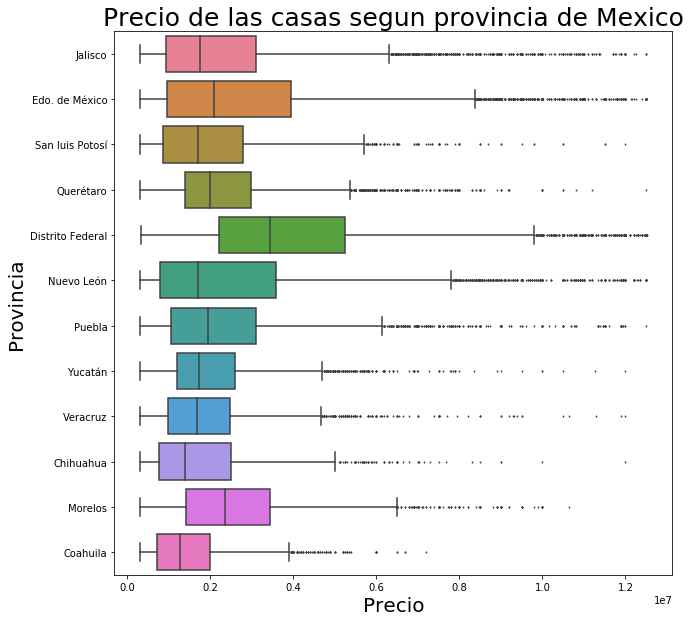

In [168]:
plt.figure(figsize=(10,10))
g = sns.boxplot(x="precio", y="provincia", data=df_casas, palette="husl",fliersize=1)
g.set_title("Precio de las casas segun provincia de Mexico", fontsize=25)
g.set_xlabel("Precio", fontsize=20)
g.set_ylabel("Provincia", fontsize=20)
#Parece haber un precio minimo para poder publicar y que las casas  mas costosas estan en DF

fig = g.get_figure()
fig.savefig("Precio_casas_por_provincia", bbox_inches = 'tight')

In [169]:
#Analisis de metros total de la propiedad vs precio 
df['metrostotales'].value_counts()

90.0     7042
200.0    6957
160.0    6026
120.0    5687
300.0    4837
250.0    4360
140.0    3314
180.0    3304
60.0     3165
105.0    3051
150.0    2837
100.0    2815
80.0     2401
400.0    2001
70.0     1888
130.0    1871
110.0    1754
128.0    1746
240.0    1660
220.0    1654
144.0    1595
170.0    1567
96.0     1542
65.0     1445
75.0     1337
72.0     1271
126.0    1172
112.0    1170
350.0    1151
210.0    1095
         ... 
439.0      54
381.0      53
20.0       52
379.0      52
38.0       51
394.0      51
39.0       50
423.0      47
421.0      46
433.0      42
25.0       40
393.0      40
429.0      39
34.0       36
31.0       34
33.0       34
15.0       32
37.0       28
28.0       28
27.0       28
26.0       22
24.0       21
16.0       19
29.0       18
22.0       17
18.0       14
21.0       14
17.0       13
23.0       10
19.0        8
Name: metrostotales, Length: 425, dtype: int64

In [170]:
#Limpio los null de metros totales 
df_metros_totales = df.dropna(subset=['metrostotales'])
df_metros_totales.isnull().sum()
df_metros_totales

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,0.000000,0.000000,2015-08-23,False,False,False,False,False,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310204,-99.227654,2013-06-28,False,False,False,True,True,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,0.000000,0.000000,2015-10-17,False,False,False,False,False,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301889,-99.688019,2012-03-09,False,False,False,True,True,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,0.000000,0.000000,2016-06-07,False,False,False,False,False,1150000.0
5,126147,departamento en venta taxqueña,"amplio departamento, estancia de sala y comedo...",Apartamento,Condominio Tlalpan 2B,Coyoacán,Distrito Federal,5.0,2.0,1.0,...,23650.0,19.300611,-99.148476,2014-03-18,False,False,False,False,True,1100000.0
6,139233,de oportunidad casa en san lorenzo,"ubicada en esquina, pertenece san lorenzo agen...",Casa,S/D,Oaxaca de Juárez,Oaxaca,NaN,3.0,1.0,...,73510.0,17.143503,-96.803505,2016-02-23,False,False,False,False,False,1150000.0
7,5013,casa emilia en venta en selvamar playa del carmen,casa emilia en venta playa del carmenfracciona...,Casa,condominio el trebol,Playa del Carmen,Quintana Roo,2.0,4.0,2.0,...,130510.0,20.672611,-87.037971,2016-10-20,False,False,False,False,False,4200000.0
12,47890,hermosa casa en zibata queretaro 170m²,<p><strong>casa </strong>en venta en fracciona...,Casa,"Pitahayas 2 - 58, Zibata",Querétaro,Querétaro,0.0,3.0,2.0,...,83666.0,20.682878,-100.317505,2013-08-12,False,True,False,True,True,1500000.0
13,130216,casa matias romero - sión bancaria,flamante casa habitación en condominio horizon...,Casa,"MATIAS ROMERO, COLONIA DEL VALLE",Benito Juárez,Distrito Federal,20.0,NaN,0.0,...,50003995.0,19.374895,-99.149521,2015-03-31,False,False,False,False,False,3000000.0


In [171]:
filtro_metros=df_metros_totales['metrostotales'].value_counts()>2500
filtro_metros=filtro_metros[filtro_metros]
df_metros_totales=df_metros_totales[df_metros_totales['metrostotales'].isin(filtro_metros.index)]

Text(0.5, 1.0, 'Relacion entre el precio de las propiedad y los metros cuadrados totales de cada una')

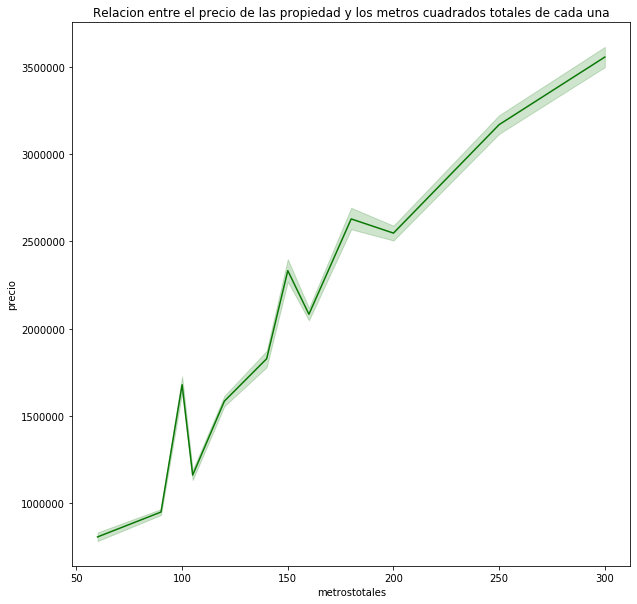

In [172]:
plt.figure(figsize=(10,10))
g=sns.lineplot(x="metrostotales", y="precio", data=df_metros_totales, color="#0b7805")
g.set_title("Relacion entre el precio de las propiedad y los metros cuadrados totales de cada una")



In [173]:
df_metros_cubiertos = df_metros_totales.dropna(subset=['metroscubiertos'])
df_metros_cubiertos['metroscubiertos'].value_counts()

60.0     1986
200.0    1944
120.0    1934
90.0     1918
180.0    1671
100.0    1647
160.0    1519
150.0    1484
250.0    1298
140.0    1244
300.0    1169
220.0     818
80.0      742
240.0     705
130.0     625
110.0     614
70.0      602
105.0     602
170.0     598
190.0     540
280.0     526
210.0     480
230.0     471
260.0     457
65.0      395
350.0     389
75.0      382
270.0     366
135.0     319
320.0     299
         ... 
371.0       4
438.0       3
416.0       3
34.0        3
437.0       3
379.0       3
389.0       3
17.0        2
376.0       2
429.0       2
24.0        2
32.0        2
381.0       2
403.0       2
436.0       2
427.0       2
439.0       1
28.0        1
431.0       1
432.0       1
22.0        1
29.0        1
391.0       1
422.0       1
428.0       1
19.0        1
424.0       1
18.0        1
23.0        1
31.0        1
Name: metroscubiertos, Length: 421, dtype: int64

In [174]:
filtro_metros=df_metros_cubiertos['metroscubiertos'].value_counts()>1000
filtro_metros=filtro_metros[filtro_metros]
df_metros_cubiertos=df_metros_cubiertos[df_metros_cubiertos['metroscubiertos'].isin(filtro_metros.index)]

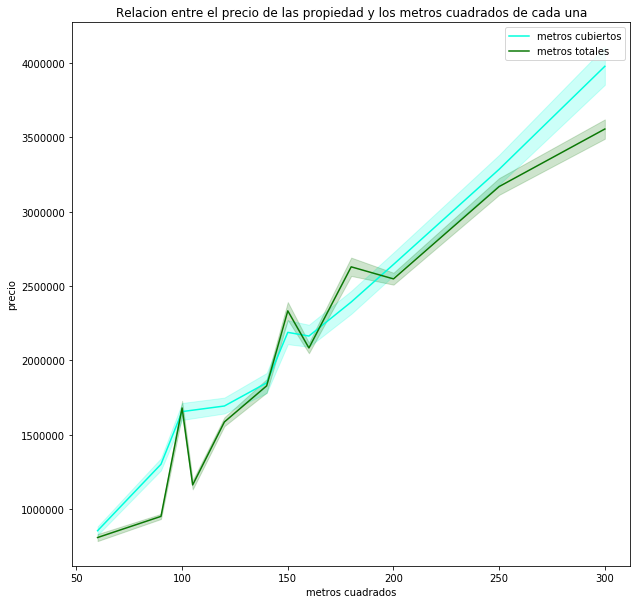

In [175]:
plt.figure(figsize=(10,10))
g=sns.lineplot(x="metroscubiertos", y="precio", data=df_metros_cubiertos, color="#00ffdd",label="metros cubiertos")
g=sns.lineplot(x="metrostotales", y="precio", data=df_metros_totales, color="#0b7805",label="metros totales")
g.set_xlabel("metros cuadrados")
g.set_title("Relacion entre el precio de las propiedad y los metros cuadrados de cada una")

fig = g.get_figure()
fig.savefig("Relacion_precio_metros_toales", bbox_inches = 'tight')

In [176]:
df['id'].value_counts()

2047      1
101220    1
68468     1
74609     1
76656     1
119663    1
121710    1
115565    1
127851    1
129898    1
123753    1
125800    1
105318    1
99173     1
113506    1
13139     1
107361    1
109408    1
21343     1
23390     1
17245     1
19292     1
31578     1
25433     1
27480     1
4951      1
6998      1
853       1
66421     1
72566     1
         ..
29860     1
27815     1
201928    1
5288      1
224455    1
222406    1
228549    1
226500    1
216259    1
220353    1
44223     1
42174     1
48317     1
46268     1
36027     1
33978     1
40121     1
60599     1
58550     1
64693     1
52403     1
50354     1
56497     1
54448     1
15533     1
13484     1
3243      1
1194      1
7337      1
2049      1
Name: id, Length: 240000, dtype: int64

In [177]:
df_metros_descubiertos = df_metros_totales.groupby('id').agg({'precio':['sum'],'metrostotales':['sum'], 'metroscubiertos': ['sum']}) # notar que se obtiene un DataFrame
df_metros_descubiertos.reset_index(inplace=True)
df_metros_descubiertos.columns = ['id', 'precio', 'metrostotales', 'metroscubiertos']
df_metros_descubiertos['metrosdescubiertos'] = df_metros_descubiertos['metrostotales']-df_metros_descubiertos['metroscubiertos']
df_metros_descubiertos['metrosdescubiertos'].value_counts()

 0.0      8886
 20.0     1448
-20.0     1248
 10.0     1170
-50.0     1141
 30.0     1135
-30.0     1097
-40.0     1028
-60.0      948
 300.0     943
-10.0      856
-100.0     854
 40.0      839
 50.0      794
 200.0     711
-80.0      699
-70.0      666
 15.0      623
 250.0     578
 25.0      486
-90.0      478
 60.0      472
 5.0       470
-15.0      457
 100.0     442
-120.0     406
 35.0      400
 160.0     400
 90.0      386
 70.0      381
          ... 
-281.0       1
 148.0       1
-261.0       1
-247.0       1
 238.0       1
-254.0       1
-237.0       1
 222.0       1
 276.0       1
-266.0       1
 234.0       1
 186.0       1
 224.0       1
 192.0       1
 261.0       1
 167.0       1
 281.0       1
 191.0       1
 205.0       1
 161.0       1
-258.0       1
 193.0       1
 164.0       1
-259.0       1
 187.0       1
-203.0       1
-202.0       1
 173.0       1
-276.0       1
-219.0       1
Name: metrosdescubiertos, Length: 482, dtype: int64

In [178]:
filtro_metros=df_metros_descubiertos['metrosdescubiertos']>=0
filtro_metros=filtro_metros[filtro_metros]
df_metros_descubiertos=df_metros_descubiertos[df_metros_descubiertos['metrosdescubiertos'].isin(filtro_metros.index)]
df_metros_descubiertos
filtro_metros=df_metros_descubiertos['metrosdescubiertos'].value_counts()>66
filtro_metros=filtro_metros[filtro_metros]
df_metros_descubiertos=df_metros_descubiertos[df_metros_descubiertos['metrosdescubiertos'].isin(filtro_metros.index)]
df_metros_descubiertos

,id,precio,metrostotales,metroscubiertos,metrosdescubiertos
5,31,950000.0,200.0,180.0,20.0
6,35,892500.0,105.0,92.0,13.0
7,36,1480000.0,120.0,108.0,12.0
10,48,550000.0,160.0,135.0,25.0
15,98,1270000.0,180.0,100.0,80.0
19,111,470000.0,60.0,45.0,15.0
21,122,700000.0,90.0,80.0,10.0
25,147,2000000.0,200.0,185.0,15.0
32,177,744000.0,160.0,0.0,160.0
36,191,380000.0,60.0,50.0,10.0


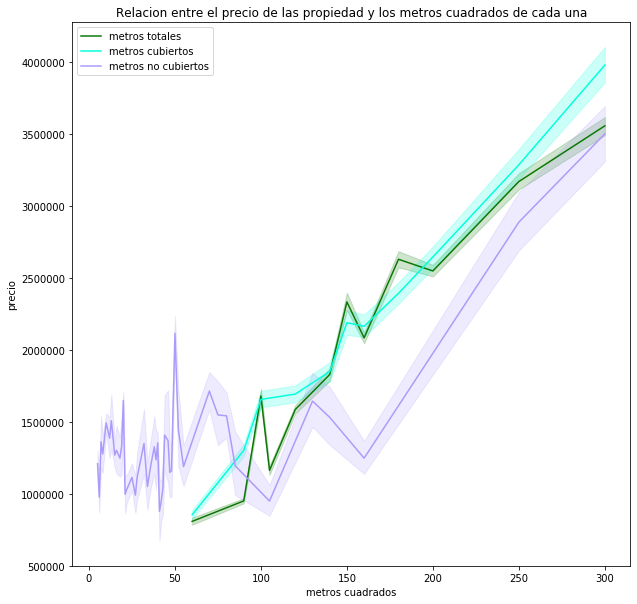

In [179]:
plt.figure(figsize=(10,10))
g=sns.lineplot(x="metrostotales", y="precio", data=df_metros_totales, color="#0b7805",label="metros totales")
g=sns.lineplot(x="metroscubiertos", y="precio", data=df_metros_cubiertos, color="#00ffdd",label="metros cubiertos")
g=sns.lineplot(x="metrosdescubiertos", y="precio", data=df_metros_descubiertos, color="#ac9bfa",label="metros no cubiertos")
g.set_xlabel("metros cuadrados")
g.set_title("Relacion entre el precio de las propiedad y los metros cuadrados de cada una")

fig = g.get_figure()
fig.savefig("Relacion_precio_metros", bbox_inches = 'tight')